In [7]:
import os
import librosa
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from multiprocessing import Pool, cpu_count
from tqdm import tqdm
import torchaudio
import torchaudio.transforms as T

In [2]:
# Configuration
AUDIO_DIR = "/home/renzo/projects/stempalooza/audio/"
PROCESSED_DIR = "/home/renzo/projects/stempalooza/processed_mel/"
SR = 8000  # Target sample rate
N_MELS = 64  # Number of mel bands
FFT_WINDOW = 1024  # FFT window size
HOP_LENGTH = 1024  # Hop length (determines time resolution)
SEGMENT_DURATION = 2.0  # Duration of each segment in seconds
NUM_WORKERS = 2

In [3]:
def process_audio(file_path):
    """Loads an MP3 file, converts it to a mel spectrogram, and normalizes it."""
    try:
        y, sr = librosa.load(file_path, sr=SR)  # Load and resample audio
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=FFT_WINDOW, hop_length=HOP_LENGTH, n_mels=N_MELS)
        log_mel = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to log scale
        
        # Normalize to range [0, 1]
        log_mel = (log_mel - log_mel.min()) / (log_mel.max() - log_mel.min())

        # Split into fixed-length segments
        segment_length = int(SEGMENT_DURATION * (sr / HOP_LENGTH))  # Compute segment length in frames
        segments = [log_mel[:, i:i+segment_length] for i in range(0, log_mel.shape[1], segment_length) if i+segment_length <= log_mel.shape[1]]

        return segments
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def process_folder(folder):
    """Processes all MP3 files in a folder and saves results after the entire folder is processed."""
    folder_path = os.path.join(AUDIO_DIR, folder)
    save_path = os.path.join(PROCESSED_DIR, folder)

    # Ensure save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Check if the folder has already been processed
    existing_files = [f for f in os.listdir(save_path) if f.endswith(".npy")]
    if existing_files:
        print(f"Skipping {folder}, already processed {len(existing_files)} files.")
        return

    folder_data = {}  # Dictionary to store all processed files

    for file in sorted(os.listdir(folder_path)):
        if file.endswith(".mp3"):
            file_path = os.path.join(folder_path, file)
            segments = process_audio(file_path)

            if segments:
                folder_data[file] = segments  # Store segments in memory

    # Save all processed files at once
    for file, segments in folder_data.items():
        output_file_base = os.path.join(save_path, file.replace(".mp3", ""))
        for i, segment in enumerate(segments):
            np.save(f"{output_file_base}_seg{i}.npy", segment)

    print(f"Completed processing {folder}. Saved {len(folder_data)} files.")


def main():
    """Processes only 1-2 folders at a time, reducing CPU load."""
    os.makedirs(PROCESSED_DIR, exist_ok=True)
    folders = sorted([f for f in os.listdir(AUDIO_DIR) if f.isdigit()])  # Ensure numerical order

    with Pool(NUM_WORKERS) as pool:  # Process 1-2 folders at a time
        pool.map(process_folder, folders)

In [4]:
main()

Completed processing 020. Saved 192 files.
Completed processing 000. Saved 199 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 021. Saved 170 files.
Completed processing 001. Saved 215 files.
Completed processing 002. Saved 5 files.
Completed processing 022. Saved 140 files.
Completed processing 023. Saved 159 files.
Completed processing 003. Saved 196 files.
Completed processing 024. Saved 177 files.
Completed processing 025. Saved 103 files.
Completed processing 004. Saved 240 files.
Completed processing 026. Saved 160 files.
Completed processing 005. Saved 129 files.
Completed processing 027. Saved 141 files.
Completed processing 006. Saved 151 files.
Completed processing 028. Saved 135 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 007. Saved 116 files.
Completed processing 029. Saved 145 files.
Completed processing 008. Saved 78 files.
Completed processing 030. Saved 135 files.
Completed processing 009. Saved 94 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!
[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 031. Saved 117 files.
Completed processing 010. Saved 230 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1844] error: dequantization failed!


Completed processing 032. Saved 184 files.
Completed processing 033. Saved 134 files.
Completed processing 011. Saved 267 files.
Completed processing 034. Saved 95 files.
Completed processing 035. Saved 91 files.
Completed processing 012. Saved 202 files.
Completed processing 036. Saved 170 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 013. Saved 158 files.
Completed processing 037. Saved 119 files.
Completed processing 038. Saved 150 files.
Completed processing 014. Saved 269 files.
Completed processing 039. Saved 109 files.
Completed processing 015. Saved 142 files.
Completed processing 040. Saved 206 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1774] error: part2_3_length (3264) too large for available bit count (3224)


Completed processing 041. Saved 124 files.
Completed processing 016. Saved 214 files.
Completed processing 017. Saved 169 files.
Completed processing 042. Saved 208 files.
Completed processing 018. Saved 136 files.
Completed processing 043. Saved 166 files.


/tmp/ipykernel_3965/1681739545.py:9: RuntimeWarning: invalid value encountered in divide
  log_mel = (log_mel - log_mel.min()) / (log_mel.max() - log_mel.min())


Completed processing 019. Saved 187 files.
Completed processing 044. Saved 141 files.
Completed processing 045. Saved 115 files.
Completed processing 060. Saved 197 files.
Completed processing 061. Saved 122 files.
Completed processing 046. Saved 159 files.
Completed processing 062. Saved 168 files.
Completed processing 047. Saved 184 files.
Completed processing 048. Saved 187 files.
Completed processing 063. Saved 237 files.
Completed processing 049. Saved 95 files.
Completed processing 050. Saved 141 files.
Completed processing 064. Saved 243 files.
Completed processing 051. Saved 202 files.
Completed processing 065. Saved 144 files.
Completed processing 052. Saved 178 files.
Completed processing 053. Saved 115 files.
Completed processing 066. Saved 264 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1774] error: part2_3_length (3360) too large for available bit count (3240)
[src/libmpg123/layer3.c:INT123_do_layer3():1774] error: part2_3_length (3328) too large for available bit count (3240)


Completed processing 054. Saved 243 files.
Completed processing 067. Saved 187 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 068. Saved 180 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 055. Saved 213 files.
Completed processing 069. Saved 191 files.
Completed processing 056. Saved 178 files.
Completed processing 070. Saved 173 files.
Completed processing 057. Saved 205 files.
Completed processing 058. Saved 119 files.
Completed processing 071. Saved 326 files.
Completed processing 059. Saved 201 files.
Completed processing 072. Saved 165 files.
Completed processing 080. Saved 132 files.
Completed processing 073. Saved 156 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1844] error: dequantization failed!


Completed processing 081. Saved 115 files.
Completed processing 074. Saved 153 files.
Completed processing 082. Saved 188 files.
Completed processing 083. Saved 118 files.
Completed processing 075. Saved 242 files.
Completed processing 084. Saved 124 files.
Completed processing 076. Saved 113 files.
Completed processing 077. Saved 64 files.
Completed processing 078. Saved 73 files.
Completed processing 085. Saved 156 files.
Completed processing 079. Saved 92 files.
Completed processing 086. Saved 125 files.
Completed processing 100. Saved 59 files.
Completed processing 101. Saved 52 files.
Completed processing 102. Saved 48 files.
Completed processing 103. Saved 32 files.
Completed processing 087. Saved 174 files.
Completed processing 088. Saved 63 files.
Completed processing 104. Saved 107 files.
Completed processing 089. Saved 75 files.
Completed processing 105. Saved 151 files.
Completed processing 090. Saved 94 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 106. Saved 103 files.
Completed processing 091. Saved 279 files.


/tmp/ipykernel_3965/1681739545.py:9: RuntimeWarning: invalid value encountered in divide
  log_mel = (log_mel - log_mel.min()) / (log_mel.max() - log_mel.min())


Completed processing 092. Saved 119 files.
Completed processing 107. Saved 217 files.
Completed processing 093. Saved 138 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 094. Saved 111 files.
Completed processing 108. Saved 254 files.
Completed processing 095. Saved 117 files.
Completed processing 109. Saved 214 files.
Completed processing 096. Saved 128 files.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Completed processing 110. Saved 190 files.
Completed processing 097. Saved 185 files.


/tmp/ipykernel_3965/1681739545.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR)  # Load and resample audio
/home/renzo/projects/stempalooza/stem/lib/python3.13/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_3965/1681739545.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SR)  # Load and resample audio
/home/renzo/projects/stempalooza/stem/lib/python3.13/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 33361.
Note: Trying to resy

Completed processing 111. Saved 221 files.
Completed processing 098. Saved 227 files.
Completed processing 112. Saved 165 files.
Completed processing 099. Saved 199 files.
Completed processing 113. Saved 232 files.
Completed processing 120. Saved 185 files.
Completed processing 121. Saved 161 files.
Completed processing 114. Saved 189 files.
Completed processing 115. Saved 163 files.
Completed processing 122. Saved 287 files.
Completed processing 116. Saved 233 files.
Completed processing 117. Saved 124 files.
Completed processing 123. Saved 268 files.
Completed processing 118. Saved 200 files.
Completed processing 124. Saved 196 files.
Completed processing 119. Saved 136 files.
Completed processing 125. Saved 200 files.
Completed processing 140. Saved 161 files.
Completed processing 141. Saved 131 files.
Completed processing 126. Saved 304 files.
Completed processing 142. Saved 173 files.
Completed processing 143. Saved 129 files.
Completed processing 127. Saved 264 files.
Completed p

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import os

# Ensure that plots are rendered inline in Jupyter
%matplotlib inline

def visualize_all_segments(segments, title="Mel Spectrogram for All Segments"):
    """Visualizes all mel spectrogram segments concatenated into one plot."""
    # Concatenate all segments along the time axis (axis 1)
    combined_segments = np.concatenate(segments, axis=1)

    # Plot the combined mel spectrogram
    plt.figure(figsize=(15, 6))
    librosa.display.specshow(combined_segments, x_axis='time', y_axis='mel', cmap='inferno')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

def visualize_segments(folder_path):
    """Visualizes mel spectrogram segments from processed folder."""
    # Loop through each MP3 file in the folder
    for file in sorted(os.listdir(folder_path)):
        if file.endswith(".mp3"):
            file_path = os.path.join(folder_path, file)
            segments = process_audio(file_path)  # Get all segments for the current file

            if segments:
                # Visualize all segments concatenated together in one plot
                visualize_all_segments(segments, title=f"Mel Spectrogram for {file}")
            else:
                print(f"Warning: No segments found for {file}")
        break

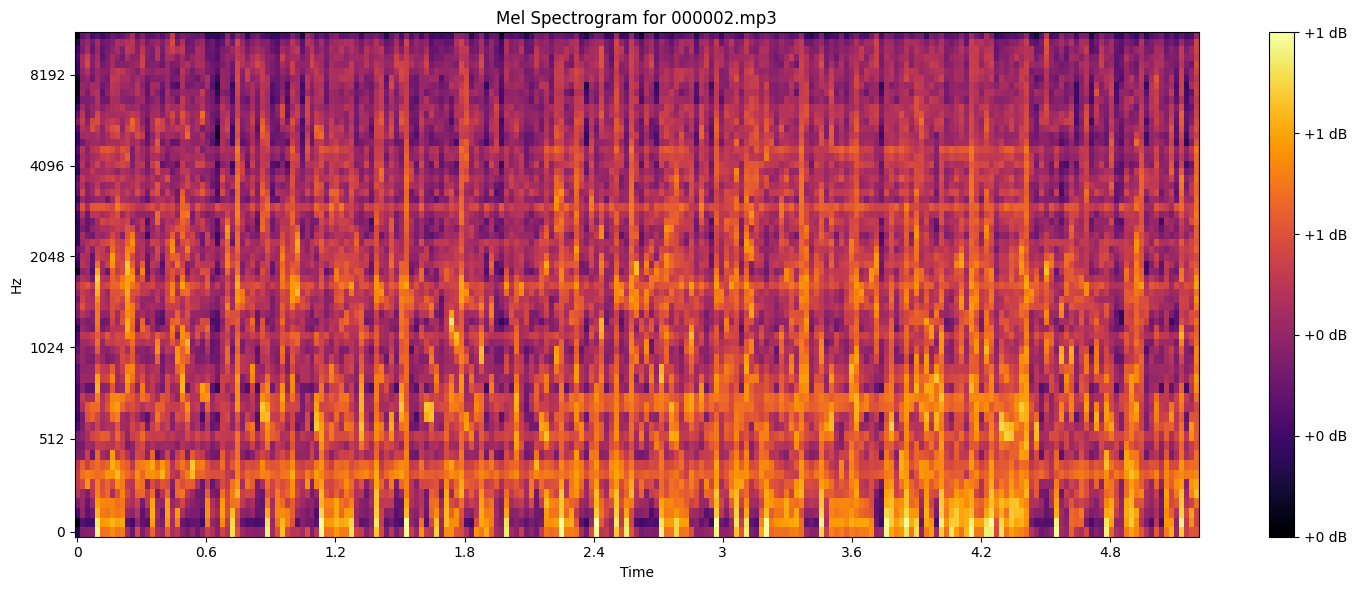

In [24]:
visualize_segments("/home/renzo/projects/stempalooza/audio/000/")
#visualize_mel(np.load('/home/renzo/projects/stempalooza/processed_mel/000/000002_seg4.npy'))